In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import os
from anndata import AnnData
import os

In [2]:
adata=sc.read_h5ad("/exports/archive/hg-funcgenom-research/Genelab_dataset/OSD-562/adata_raw.h5ad")

/exports/archive/hg-funcgenom-research/cnovellarausell/conda_envs/sc_analysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
metadata_assay=pd.read_csv("/exports/archive/hg-funcgenom-research/Genelab_dataset/OSD-562/OSD-562-assays.csv")

In [4]:
metadata_assay['Sample Name'] = metadata_assay['Sample Name'].str.replace('RRRM2_HPC_', '', regex=False)

In [5]:
adata.obs["barcode"]=adata.obs.index

In [6]:
adata.obs = pd.merge(adata.obs, metadata_assay, left_on='sample', right_on='Sample Name', how='inner')

In [7]:
adata.obs.index=adata.obs["barcode"]

In [12]:
spike_cols = [col for col in adata.obs.columns if 'Slide' in col]

In [15]:
adata.obs['Slide'] = adata.obs['Parameter Value: Slide Information_x'].str.split('_').str[0]

In [16]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/exports/archive/hg-funcgenom-research/cnovellarausell/conda_envs/sc_analysis/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

In [18]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/exports/archive/hg-funcgenom-research/cnovellarausell/conda_envs/sc_analysis/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/exports/archive/hg-funcgenom-research/cnovellarausell/conda_envs/sc_analysis/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/exports/archive/hg-funcgenom-research/cnovellarausell/conda_envs/sc_analysis/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' i

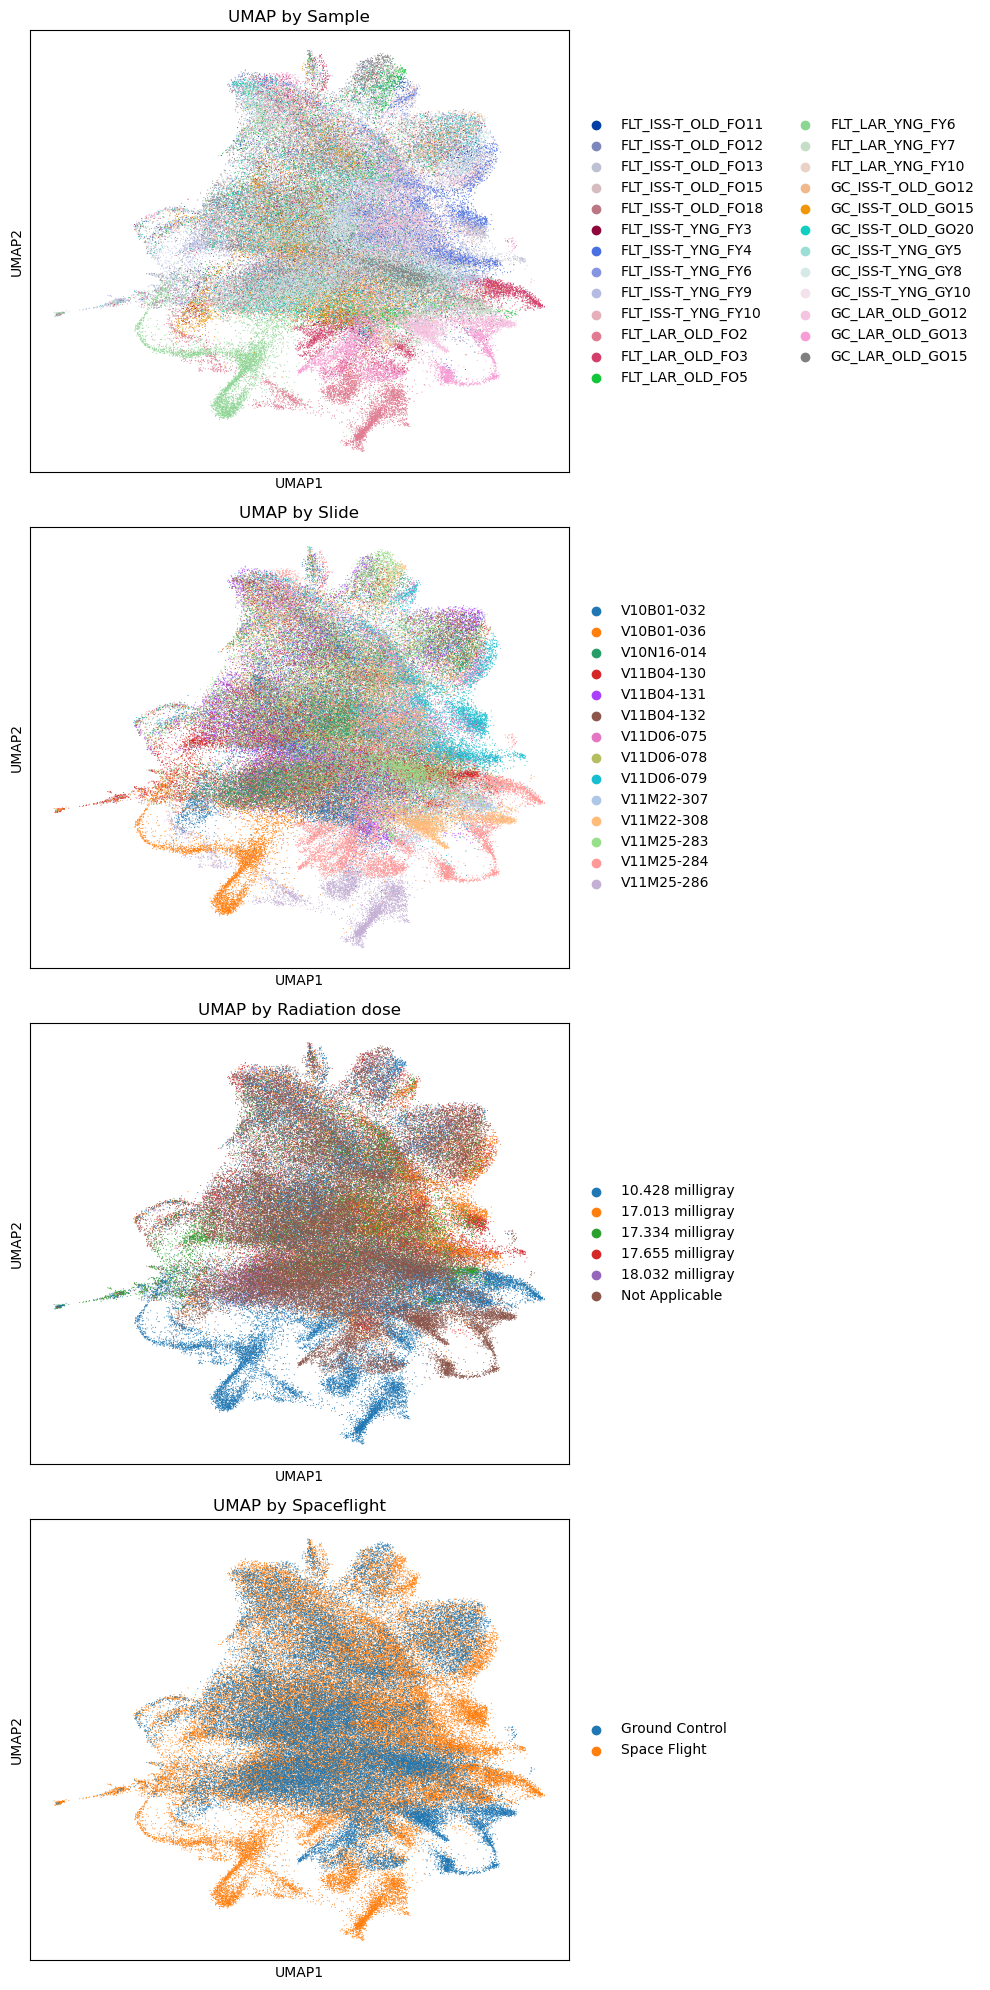

In [19]:
os.mkdir("preprocessing")
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(10, 20))  

sc.pl.umap(adata, color='sample', size=2, ax=axs[0], show=False)
axs[0].set_title('UMAP by Sample')

sc.pl.umap(adata, color='Slide', size=2, ax=axs[1], show=False)
axs[1].set_title('UMAP by Slide')

sc.pl.umap(adata, color='Parameter Value: absorbed radiation dose', size=2, ax=axs[2], show=False)
axs[2].set_title('UMAP by Radiation dose')

sc.pl.umap(adata, color='Factor Value: Spaceflight', size=2, ax=axs[3], show=False)
axs[3].set_title('UMAP by Spaceflight')

plt.tight_layout()
plt.savefig("preprocessing/UMAPs_raw_data.png")
plt.show()

In [52]:
adata.write_h5ad("/exports/archive/hg-funcgenom-research/Genelab_dataset/OSD-562/adata_raw.h5ad")